In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [25]:
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.metrics import r2_score

def plot_r2(y, y_pred, title):
    plt.figure(figsize=(10, 6))
    plt.grid()
    plt.scatter(y, y_pred, marker='.')
    plt.xlabel("Actual Target"); plt.ylabel("Predicted Target")
    plt.title(title)
    xmn, xmx = plt.xlim()
    ymn, ymx = plt.ylim()
    mx = max(xmx, ymx) 
    buff = mx * .1
    plt.text(xmn + buff, mx - buff, "R2 Score: %f" % (r2_score(y, y_pred), ), size=15)
    plt.plot([0., mx], [0., mx])
    plt.xlim(xmn, mx)
    plt.ylim(ymn, mx)

In [2]:
df = pd.read_csv("heights_and_weights.csv")[:100]
df.head()

,HHX,FMX,FPX,SEX,BMI,SLEEP,educ,height,weight
0,16,1,2,1,33.36,8,16,74,260
1,20,1,1,1,26.54,7,14,70,185
2,69,1,2,2,32.13,7,9,61,170
3,87,1,1,1,26.62,8,14,68,175
4,88,1,1,2,27.13,8,13,66,168


In [3]:
feats = df.drop("weight", axis=1) # drop the weight from the feature matrix

In [4]:
feats.head()

,HHX,FMX,FPX,SEX,BMI,SLEEP,educ,height
0,16,1,2,1,33.36,8,16,74
1,20,1,1,1,26.54,7,14,70
2,69,1,2,2,32.13,7,9,61
3,87,1,1,1,26.62,8,14,68
4,88,1,1,2,27.13,8,13,66


In [11]:
X = feats.values
Y = df['weight'].values

In [12]:
X_scaled = StandardScaler().fit_transform(X) # always regularize your features

In [20]:
X[0]

array([ 16.  ,   1.  ,   2.  ,   1.  ,  33.36,   8.  ,  16.  ,  74.  ])

In [21]:
X_scaled[0]

array([-1.68441279, -0.10050378,  1.3350371 , -1.1751393 ,  0.16056585,
       -0.12658553,  0.17168522,  0.52391218])

In [23]:
lr = LinearRegression()
lr.fit(X_scaled, Y)  # fit a linear regression of the scaled X values vs Y

LinearRegression(copy_X=True, fit_intercept=True, normalize=False)

In [24]:
y_pred = lr.predict(X_scaled)  # predicted Y values 

In [28]:
from sklearn.metrics import r2_score
r2_score(Y, y_pred)  # r squared is our function for determining how good the model did against real data

0.73475490114503716

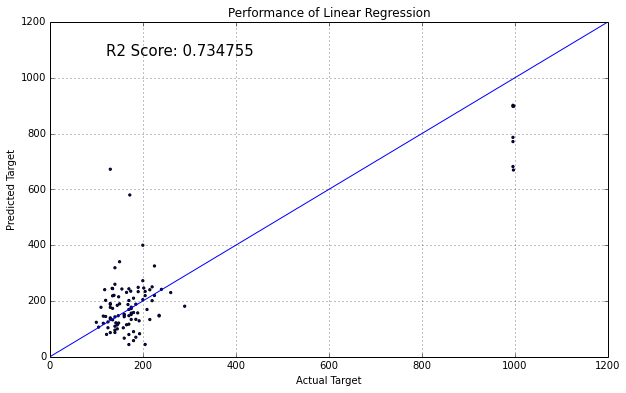

In [30]:
plot_r2(Y, y_pred, "Performance of Linear Regression")

In [ ]:
'''On to K-NN'''
from sklearn.neighbors import KNeighborsRegressor

# a very serious algorithm
knn = KNeighborsRegressor(n_neighbors=1)
knn.fit(X_scaled, y)

# how good is k-nearest neighbors?
y_pred = knn.predict(X_scaled)
plot_r2(y, y_pred, "Performance of KNN (K=1)")